In [24]:
import pandas as pd
import geopandas as gpd 
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
housing_data_file ="Data/housing.csv"

In [3]:
df = pd.read_csv(housing_data_file)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
print("Max Hous-Price:",df["median_house_value"].max(), "Min Hous-Price:",df["median_house_value"].min())

Max Hous-Price: 500001.0 Min Hous-Price: 14999.0


In [6]:
for c in df.columns:
    print(c,"Contains NaN?:",df[c].isnull().values.any())

longitude Contains NaN?: False
latitude Contains NaN?: False
housing_median_age Contains NaN?: False
total_rooms Contains NaN?: False
total_bedrooms Contains NaN?: True
population Contains NaN?: False
households Contains NaN?: False
median_income Contains NaN?: False
median_house_value Contains NaN?: False
ocean_proximity Contains NaN?: False


In [7]:
df = df.dropna()

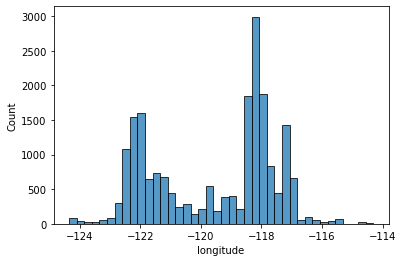

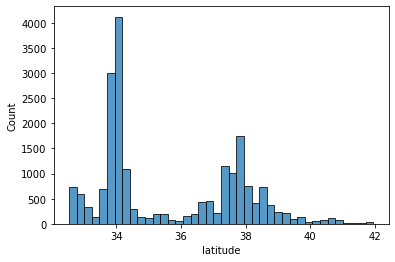

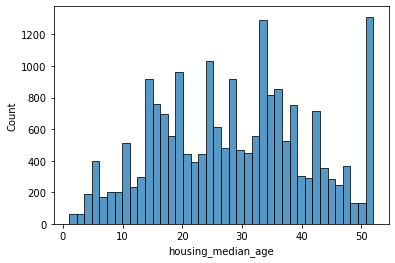

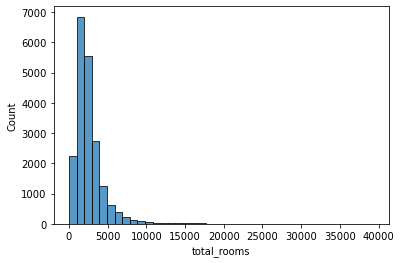

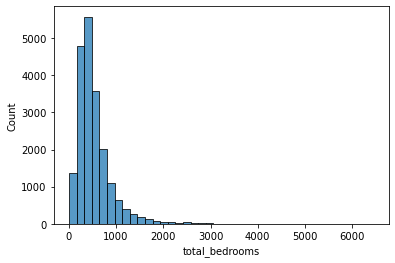

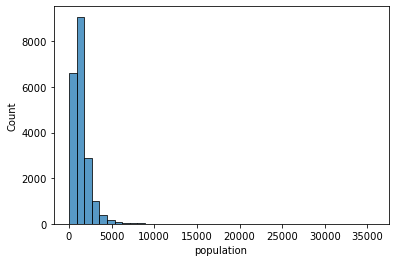

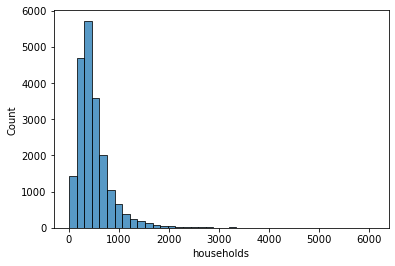

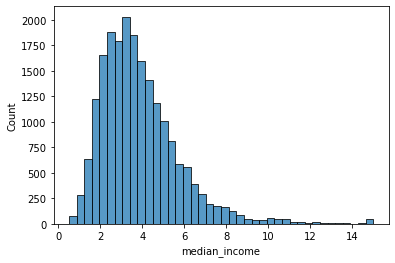

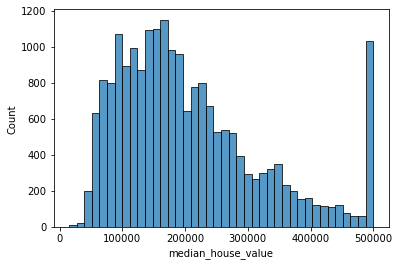

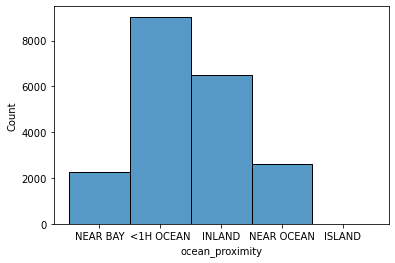

In [8]:
for col in df.columns:
    fig,ax = plt.subplots()
    sns.histplot(df,x=df[col],bins=40,ax=ax)
    plt.show()
    

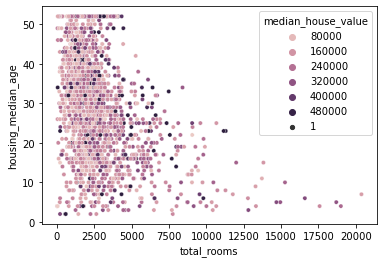

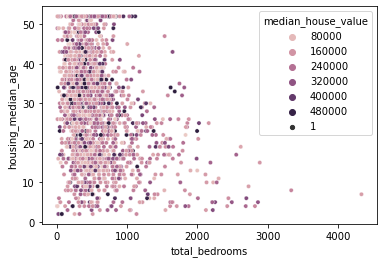

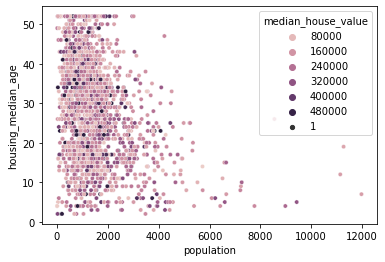

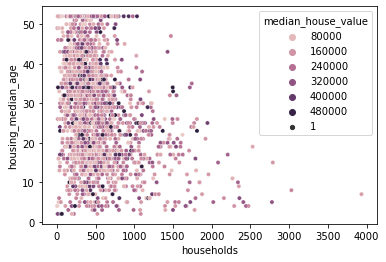

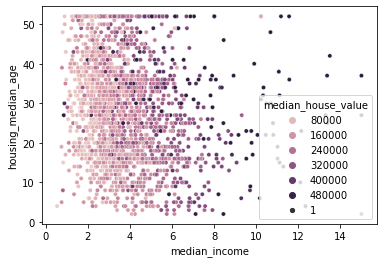

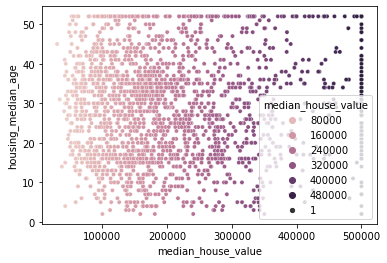

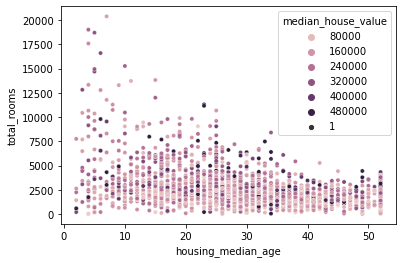

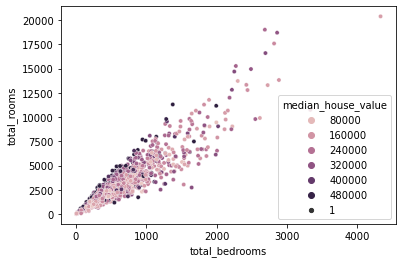

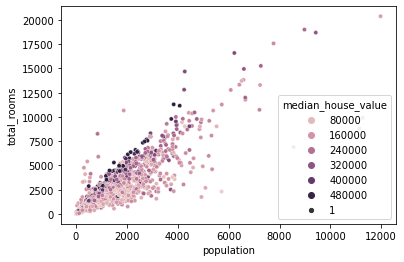

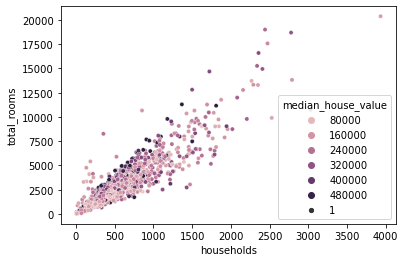

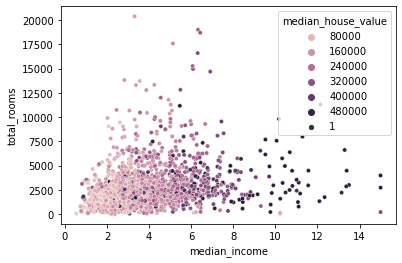

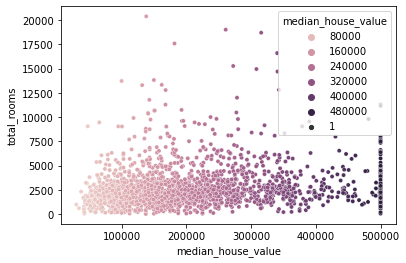

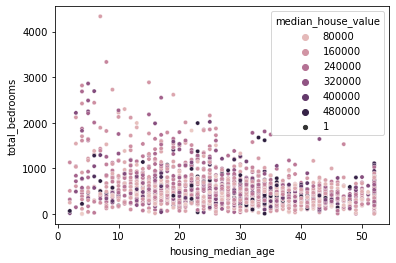

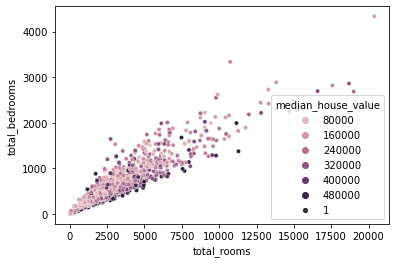

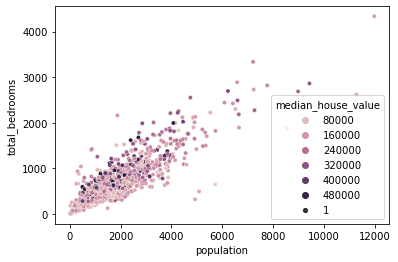

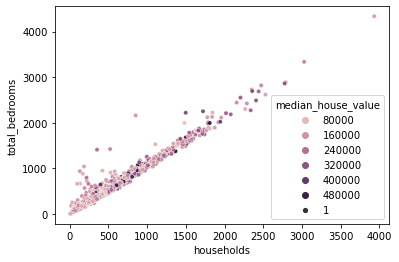

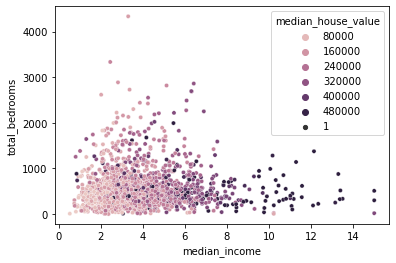

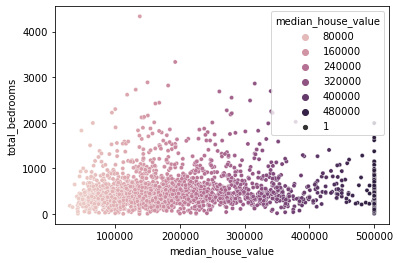

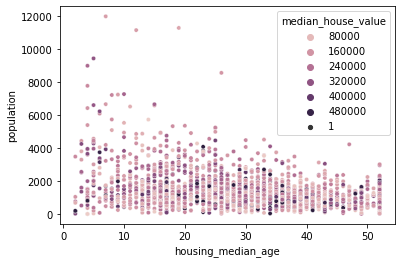

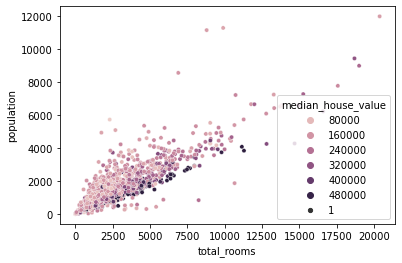

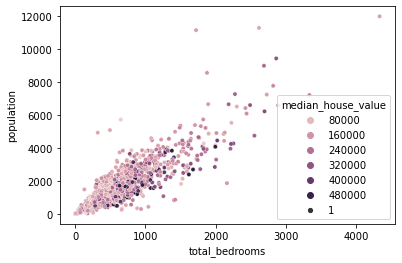

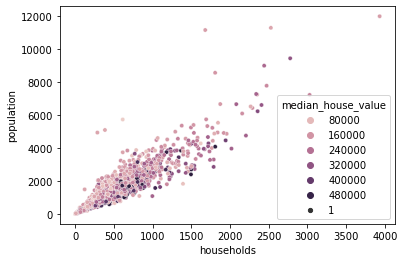

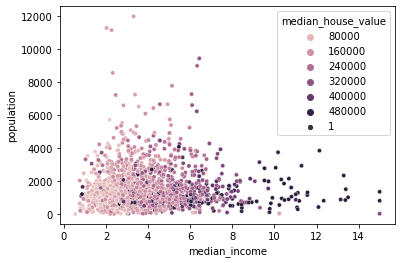

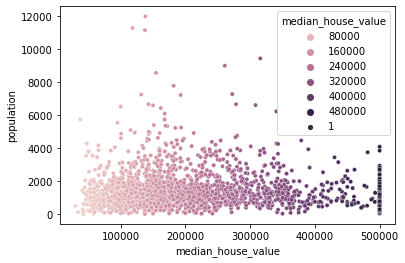

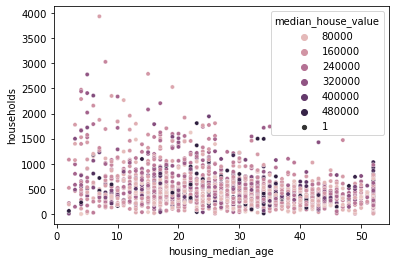

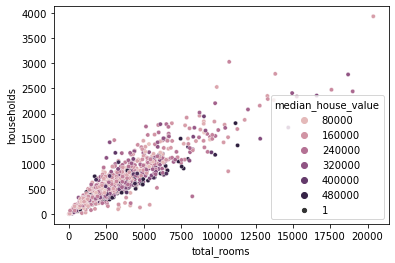

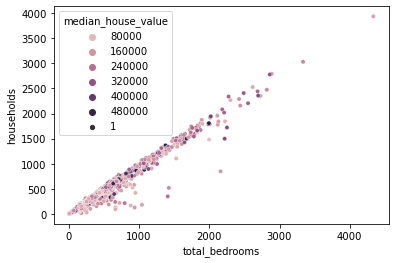

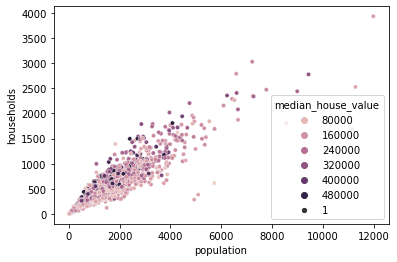

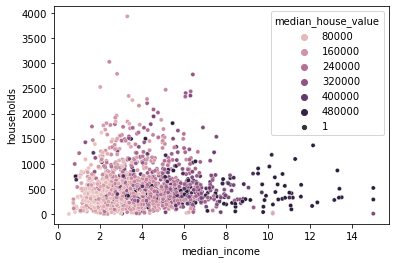

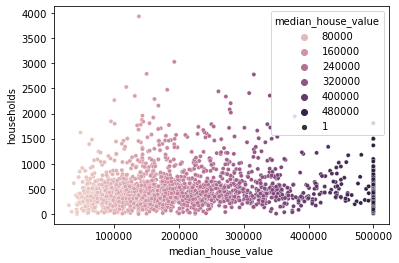

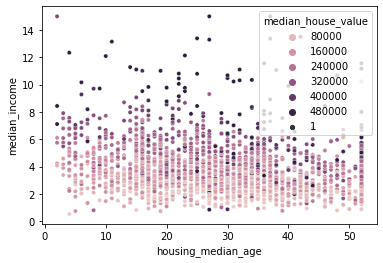

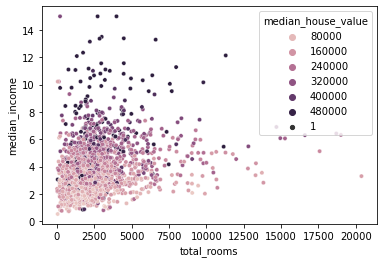

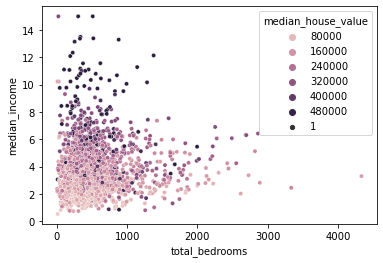

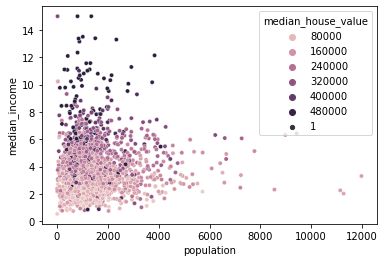

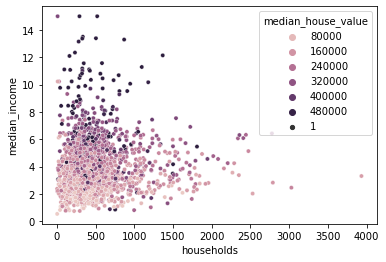

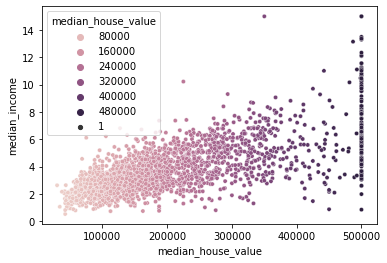

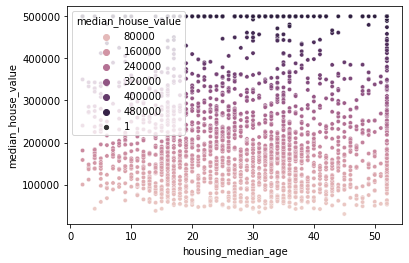

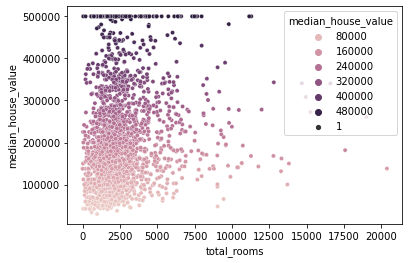

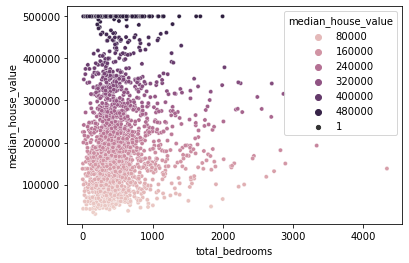

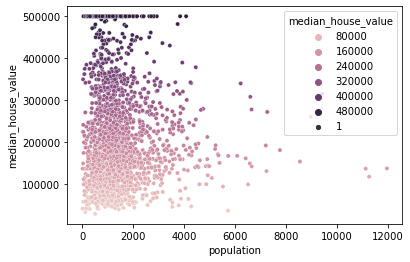

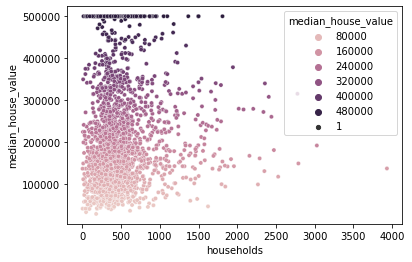

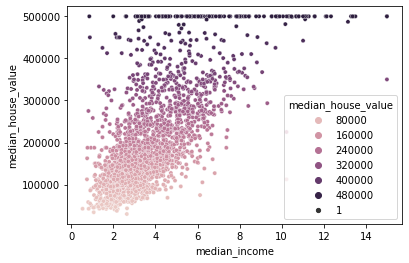

In [9]:
sample_df = df.sample(math.ceil(len(df)*0.1) )
columns = list(sample_df.columns[2:])
columns.remove("ocean_proximity")
for col2 in columns:
    for col1 in columns:
        if col2 != col1:
            fig,ax = plt.subplots()
            sns.scatterplot(
                data=sample_df,
                x=col1,
                y=col2,
                hue="median_house_value",
                size=1,
                ax=ax)
            plt.show()

<AxesSubplot:>

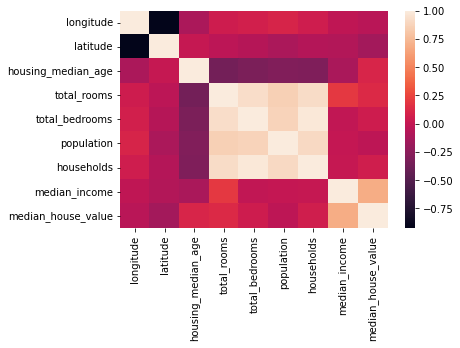

In [10]:
sns.heatmap(df.corr())

In [11]:
to_replace ={}
for i,v in enumerate(df.ocean_proximity.unique()):
    to_replace[v]=i

to_replace

{'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4}

In [12]:
df = df.replace({"ocean_proximity":to_replace})

In [13]:
X =df.drop("median_house_value",axis=1)
Y = df["median_house_value"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [22]:
clf = RandomForestRegressor(100)
clf.fit(scaler.transform(X_train), y_train)

RandomForestRegressor()

In [23]:
pred = clf.predict(scaler.transform(X_train))
mean_squared_error(y_train, pred)

355807805.06981266

In [18]:
parameters = {
    'n_estimators':[100, 250, 500, 1000],
    'criterion':  ["squared_error", "absolute_error","friedman_mse","poisson"],
    'max_depth':[None, 2,4,8],
    'min_samples_split': [2, 3, 4],
    "min_samples_leaf": [1, 2, 3],
    "max_features": ["sqrt","log2",None],
    "n_jobs": [4],
    }

In [25]:
clf = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    scoring='mean_squared_error', 
    verbose=2,
    n_jobs=8)

clf.fit(X_train,y_train)

ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.